# PART A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
#1. Data Understanding & Exploration:
#A) Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. 
#B) Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. 
d1=pd.read_csv("TelcomCustomer-Churn_1.csv")
d2=pd.read_csv("TelcomCustomer-Churn_2.csv")
d1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [3]:
d2

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#C) Merge both the DataFrames on key ‘customerID’ to form a single DataFrame
d = pd.merge(d1,d2,on='customerID')
d

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#D) Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [
d.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#2) Data Cleaning & Analysis:
#A) Impute missing/unexpected values in the DataFrame. 
d.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
d.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#B) Make sure all the variables with continuous values are of ‘Float’ type.
d['TotalCharges']=pd.to_numeric(d['TotalCharges'],errors='coerce')

In [9]:
d.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.tree import export_graphviz  
from IPython.display import Image  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time
from sklearn import preprocessing

In [11]:
#C) Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. 
def ChangeDatatypes(d):
    d['customerID'] = d['customerID'] .astype('category')
    d['gender'] = d['gender'] .astype('category')
    d['SeniorCitizen'] = d['SeniorCitizen'] .astype('category')
    d['Partner'] = d['Partner'] .astype('category')
    d['Dependents'] = d['Dependents'] .astype('category')
    d['PhoneService'] = d['PhoneService'] .astype('category')
    d['MultipleLines'] = d['MultipleLines'] .astype('category')
    d['InternetService'] = d['InternetService'] .astype('category')
    d['OnlineSecurity'] = d['OnlineSecurity'] .astype('category')
    d['OnlineBackup '] = d['OnlineBackup '] .astype('category')
    d['DeviceProtection'] = d['DeviceProtection'] .astype('category')
    d['TechSupport'] = d['TechSupport'] .astype('category')
    d['StreamingTV'] = d['StreamingTV'] .astype('category')
    d['Contract'] = d['Contract'] .astype('category')
    d['PaperlessBilling'] = d['PaperlessBilling'] .astype('category')
    d['PaymentMethod '] = d['PaymentMethod '] .astype('category')
    d['Churn'] = d['Churn'] .astype('category')
    d['Name'] = df['Name'] .astype('category')
    
    cat_columns = d.select_dtypes(['category']).columns
    d[cat_columns] = d[cat_columns].apply(lambda x: x.cat.codes)
    return(d)

<AxesSubplot:ylabel='gender'>

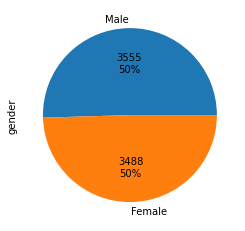

In [12]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['gender'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='SeniorCitizen'>

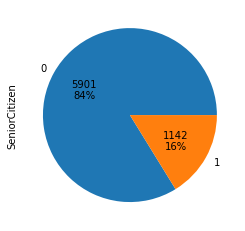

In [13]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['SeniorCitizen'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='Partner'>

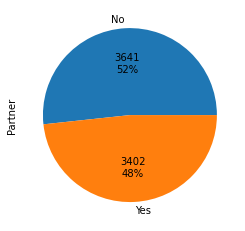

In [14]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['Partner'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='Dependents'>

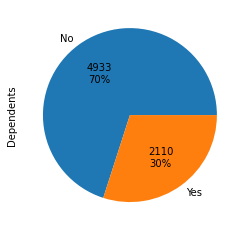

In [15]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['Dependents'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='PhoneService'>

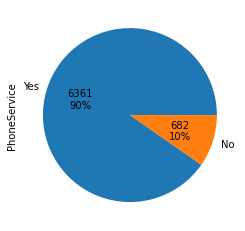

In [16]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['PhoneService'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='MultipleLines'>

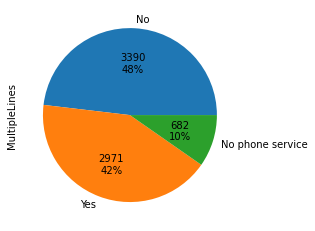

In [17]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['MultipleLines'].value_counts().plot(kind='pie',autopct=label_function)

<AxesSubplot:ylabel='InternetService'>

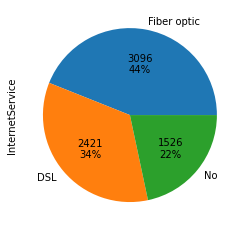

In [18]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['InternetService'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='OnlineSecurity'>

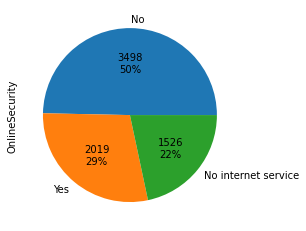

In [19]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['OnlineSecurity'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='OnlineBackup'>

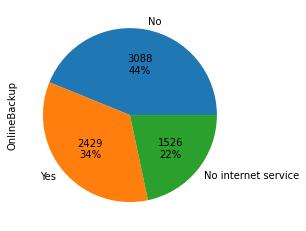

In [20]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['OnlineBackup'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='DeviceProtection'>

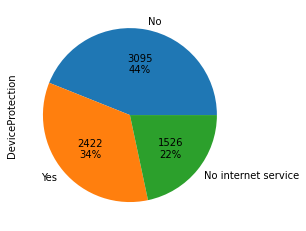

In [21]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['DeviceProtection'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='TechSupport'>

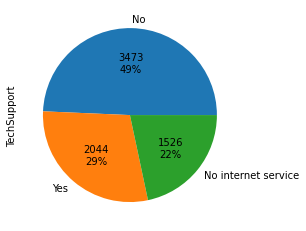

In [22]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['TechSupport'].value_counts().plot(kind='pie',autopct=label_function)

<AxesSubplot:ylabel='StreamingTV'>

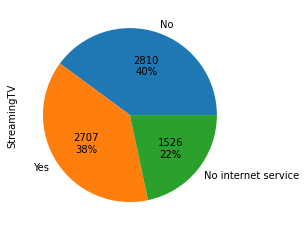

In [23]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['StreamingTV'].value_counts().plot(kind='pie',autopct=label_function)


<AxesSubplot:ylabel='Contract'>

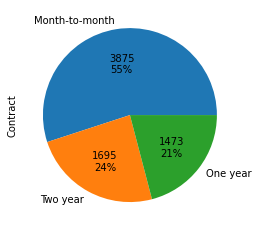

In [24]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['Contract'].value_counts().plot(kind='pie',autopct=label_function)

<AxesSubplot:ylabel='PaperlessBilling'>

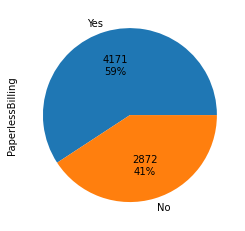

In [25]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['PaperlessBilling'].value_counts().plot(kind='pie',autopct=label_function)

<AxesSubplot:ylabel='PaymentMethod'>

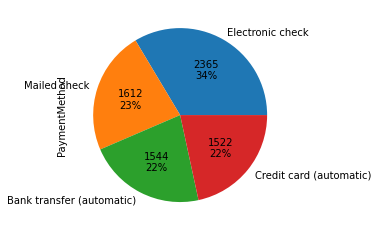

In [26]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['PaymentMethod'].value_counts().plot(kind='pie',autopct=label_function)

<AxesSubplot:ylabel='Churn'>

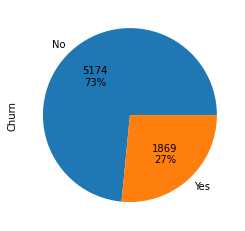

In [27]:
def label_function(val):
    return f'{val / 100 * len(d):.0f}\n{val:.0f}%'

d['Churn'].value_counts().plot(kind='pie',autopct=label_function)


#D. Share insights for Q2.c

1) In Gender they are equally distributed.

2) Only 16% of them are seniorcitizen in the telecom 

3) Only 48% customers are partners.

4) Only 30% customers are dependents of telecom.

5) 90% of customers have PhoneService from the telecom

6) 42% of customers have multiplelines

7) 34% of customers have DSL and 44% of customers have Fiberoptic of Internet service

8) 29% of customers have Online security and 50% of customers have no Online security.

9) 34% of customers have Online Backup 44% of customers have no Online Backup for device protection.

10) 29% of customers have Tech support and 49% of customers have no tech support

11) 38% customers have access to Streaming TV 40% of customers have no access to StreamingTV

12) 21% customers have one year, 24% have two year and 55% have month to month of contract

13) 59% customers are paperless billings

14) 22% creditcard, 22% banktransfer, 23% mailed check and 34% electronic check payment method of customers.

15) 27% of customers are churn.

In [28]:
#E) Encode all the appropriate Categorical features with the best suitable approach
# The customerID column isnt useful as the feature is used for identification of customers. 
d.drop(["customerID"],axis=1, inplace = True)

# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
d['Churn'] = d[['Churn']].apply(binary_map)

# Encoding gender category
d['gender'] = d['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
d[binary_list] = d[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
data = pd.get_dummies(d, drop_first=True)

In [29]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,NaN,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,NaN,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,NaN,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,NaN,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,NaN,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,NaN,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,NaN,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,NaN,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,NaN,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
#F) Split the data into 80% train and 20% test.
X=data.drop(['Churn'], axis=1)
y=data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80, test_size=0.20, random_state=1)
X_train, X_test, y_train, y_test

(      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
 1814       1            NaN        1           1      12             1   
 5946       0            NaN        0           0      42             1   
 3881       1            NaN        1           0      71             1   
 2389       1            NaN        1           1      71             1   
 3676       1            NaN        0           0      30             1   
 ...      ...            ...      ...         ...     ...           ...   
 905        1            NaN        0           0       9             1   
 5192       1            NaN        0           1      60             1   
 3980       1            NaN        0           0      28             1   
 235        1            NaN        0           0       2             1   
 5157       0            NaN        1           1      16             1   
 
       PaperlessBilling  MonthlyCharges  TotalCharges  \
 1814                 0           19.70  

In [31]:
#G) Normalize/Standardize the data with the best suitable approach
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data['tenure'] = sc.fit_transform(data[['tenure']])
data['MonthlyCharges'] = sc.fit_transform(data[['MonthlyCharges']])
data['TotalCharges'] = sc.fit_transform(data[['TotalCharges']])

In [32]:
data['tenure']
data['MonthlyCharges']
data['TotalCharges']

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7043, dtype: float64

In [33]:
!pip install xgboost
!pip install catboost
!pip install lightgbm

In [34]:
#3) Model building and Improvement
from xgboost import XGBClassifier

In [35]:
#A) Train a model using XGBoost. Also print best performing parameters along with train and test performance
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print('')
print('')
print('Accuracy: %.2f%%'%(accuracy*100.0))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy: 80.70%


In [36]:
#B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

def print_scores(y_test, y_pred):
    acc_score = accuracy_score(y_test, y_pred)
    print('Accuracy :%.2f%%'%(acc_score*100.0))
    pre_score = precision_score(y_test, y_pred)
    print('Precision :%.2f%%'%(pre_score*100.0))
    rec_score = recall_score(y_test, y_pred)
    print('Recall :%.2f%%'%(rec_score*100.0))
    f_score = f1_score(y_test, y_pred, average='weighted')
    print('f1 :%.2f%%'%(f_score*100.0))
    
print_scores(y_test,y_pred)


Accuracy :80.70%
Precision :61.59%
Recall :58.05%
f1 :80.50%


The Accuracy and f1 score has better performance than precision and recall

[0]	validation_0-logloss:0.57349	validation_1-logloss:0.57478
[1]	validation_0-logloss:0.50613	validation_1-logloss:0.51139
[2]	validation_0-logloss:0.46392	validation_1-logloss:0.47023
[3]	validation_0-logloss:0.43659	validation_1-logloss:0.44419
[4]	validation_0-logloss:0.41808	validation_1-logloss:0.42726
[5]	validation_0-logloss:0.40427	validation_1-logloss:0.41553
[6]	validation_0-logloss:0.39365	validation_1-logloss:0.40843


F:\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-logloss:0.38569	validation_1-logloss:0.40388
[8]	validation_0-logloss:0.37929	validation_1-logloss:0.40098
[9]	validation_0-logloss:0.37353	validation_1-logloss:0.39949
[10]	validation_0-logloss:0.36764	validation_1-logloss:0.39872
[11]	validation_0-logloss:0.36369	validation_1-logloss:0.39841
[12]	validation_0-logloss:0.36030	validation_1-logloss:0.39768
[13]	validation_0-logloss:0.35717	validation_1-logloss:0.39771
[14]	validation_0-logloss:0.35441	validation_1-logloss:0.39748
[15]	validation_0-logloss:0.35107	validation_1-logloss:0.39761
[16]	validation_0-logloss:0.34794	validation_1-logloss:0.39702
[17]	validation_0-logloss:0.34273	validation_1-logloss:0.39635
[18]	validation_0-logloss:0.34198	validation_1-logloss:0.39713
[19]	validation_0-logloss:0.34116	validation_1-logloss:0.39797
[20]	validation_0-logloss:0.33742	validation_1-logloss:0.39996
[21]	validation_0-logloss:0.33616	validation_1-logloss:0.40002
[22]	validation_0-logloss:0.33301	validation_1-logloss:0.4

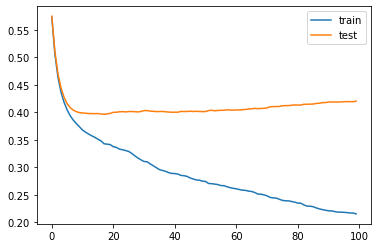

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

From the results the plot shows the better performance for train and test.

# PART B

In [38]:
# I have used the merged dataset from the Part A
d.to_csv('merged.csv')

In [39]:
#1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions.
#Read the csv
da = pd.read_csv('merged.csv')
da

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,NaN,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,1,NaN,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,2,1,NaN,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,1,NaN,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,0,NaN,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,NaN,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,7039,0,NaN,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,7040,0,NaN,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,7041,1,NaN,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [40]:
da.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,NaN,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,1,NaN,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,2,1,NaN,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,1,NaN,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,0,NaN,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [41]:
da.describe()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,0.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,3521.000000,0.504756,NaN,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,NaN,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,0.441561
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,NaN,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,0.000000
50%,3521.000000,1.000000,NaN,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,5281.500000,1.000000,NaN,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,1.000000
max,7042.000000,1.000000,NaN,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [42]:
#datatypes
da.dtypes

Unnamed: 0            int64
gender                int64
SeniorCitizen       float64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [43]:
da.isnull()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:

da.isnull().sum()

Unnamed: 0             0
gender                 0
SeniorCitizen       7043
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

In [45]:
da.isnull().value_counts()

Unnamed: 0  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
False       False   True           False    False       False   False         False          False            False           False         False             False        False        False            False     False             False          False           False         False    7032
                                                                                                                                                                                                                                                                    True          False      11
dtype: int64

In [46]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     0 non-null      float64
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [47]:
da.isnull().any()

Unnamed: 0          False
gender              False
SeniorCitizen        True
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [48]:

da.drop(['SeniorCitizen','Unnamed: 0'], axis=1, inplace=True)

In [49]:
da

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [50]:
da.isnull().sum()

gender               0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [51]:
missing_col = ['TotalCharges']
 

for i in missing_col:
    da.loc[da.loc[:,i].isnull(),i]=da.loc[:,i].median()

In [52]:
da

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [53]:
da.isnull().sum()

gender              0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:

#Encoding the other categoric features with more than two categories
dat = pd.get_dummies(da, columns=['TechSupport','StreamingTV','StreamingMovies'])
dat

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,No phone service,DSL,No,Yes,No,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,34,1,No,DSL,Yes,No,Yes,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,2,1,No,DSL,Yes,Yes,No,...,1,1,0,0,1,0,0,1,0,0
3,1,0,0,45,0,No phone service,DSL,Yes,No,Yes,...,0,0,0,1,1,0,0,1,0,0
4,0,0,0,2,1,No,Fiber optic,No,No,No,...,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,1,Yes,DSL,Yes,No,Yes,...,0,0,0,1,0,0,1,0,0,1
7039,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,...,0,1,0,0,0,0,1,0,0,1
7040,0,1,1,11,0,No phone service,DSL,Yes,No,No,...,0,1,0,0,1,0,0,1,0,0
7041,1,1,0,4,1,Yes,Fiber optic,No,No,No,...,1,1,0,0,1,0,0,1,0,0


In [55]:
dat.dtypes

gender                                   int64
Partner                                  int64
Dependents                               int64
tenure                                   int64
PhoneService                             int64
MultipleLines                           object
InternetService                         object
OnlineSecurity                          object
OnlineBackup                            object
DeviceProtection                        object
Contract                                object
PaperlessBilling                         int64
PaymentMethod                           object
MonthlyCharges                         float64
TotalCharges                           float64
Churn                                    int64
TechSupport_No                           uint8
TechSupport_No internet service          uint8
TechSupport_Yes                          uint8
StreamingTV_No                           uint8
StreamingTV_No internet service          uint8
StreamingTV_Y

In [56]:
data1 = pd.get_dummies(dat,columns=['OnlineSecurity','OnlineBackup','DeviceProtection'])
data1

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,...,StreamingMovies_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,0,1,0,1,0,No phone service,DSL,Month-to-month,1,Electronic check,...,0,1,0,0,0,0,1,1,0,0
1,1,0,0,34,1,No,DSL,One year,0,Mailed check,...,0,0,0,1,1,0,0,0,0,1
2,1,0,0,2,1,No,DSL,Month-to-month,1,Mailed check,...,0,0,0,1,0,0,1,1,0,0
3,1,0,0,45,0,No phone service,DSL,One year,0,Bank transfer (automatic),...,0,0,0,1,1,0,0,0,0,1
4,0,0,0,2,1,No,Fiber optic,Month-to-month,1,Electronic check,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,1,Yes,DSL,One year,1,Mailed check,...,1,0,0,1,1,0,0,0,0,1
7039,0,1,1,72,1,Yes,Fiber optic,One year,1,Credit card (automatic),...,1,1,0,0,0,0,1,0,0,1
7040,0,1,1,11,0,No phone service,DSL,Month-to-month,1,Electronic check,...,0,0,0,1,1,0,0,1,0,0
7041,1,1,0,4,1,Yes,Fiber optic,Month-to-month,1,Mailed check,...,0,1,0,0,1,0,0,1,0,0


In [57]:
dt= pd.get_dummies(data1, columns=['MultipleLines'])
dt

,gender,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,...,0,0,0,1,1,0,0,0,1,0
1,1,0,0,34,1,DSL,One year,0,Mailed check,56.95,...,1,1,0,0,0,0,1,1,0,0
2,1,0,0,2,1,DSL,Month-to-month,1,Mailed check,53.85,...,1,0,0,1,1,0,0,1,0,0
3,1,0,0,45,0,DSL,One year,0,Bank transfer (automatic),42.30,...,1,1,0,0,0,0,1,0,1,0
4,0,0,0,2,1,Fiber optic,Month-to-month,1,Electronic check,70.70,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,1,DSL,One year,1,Mailed check,84.80,...,1,1,0,0,0,0,1,0,0,1
7039,0,1,1,72,1,Fiber optic,One year,1,Credit card (automatic),103.20,...,0,0,0,1,0,0,1,0,0,1
7040,0,1,1,11,0,DSL,Month-to-month,1,Electronic check,29.60,...,1,1,0,0,1,0,0,0,1,0
7041,1,1,0,4,1,Fiber optic,Month-to-month,1,Mailed check,74.40,...,0,1,0,0,1,0,0,0,0,1


In [58]:
dt.dtypes

gender                                    int64
Partner                                   int64
Dependents                                int64
tenure                                    int64
PhoneService                              int64
InternetService                          object
Contract                                 object
PaperlessBilling                          int64
PaymentMethod                            object
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int64
TechSupport_No                            uint8
TechSupport_No internet service           uint8
TechSupport_Yes                           uint8
StreamingTV_No                            uint8
StreamingTV_No internet service           uint8
StreamingTV_Yes                           uint8
StreamingMovies_No                        uint8
StreamingMovies_No internet service       uint8
StreamingMovies_Yes                     

In [59]:
dt.isnull().sum()

gender                                  0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
TechSupport_No                          0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No                          0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No                      0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
OnlineSecurity_No                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                

In [60]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
 
 
# getting target data from the dataframe
target = dt["Churn"]
 
# getting train data from the dataframe
train = dt.drop(["InternetService","Contract","PaymentMethod"], axis=1)
 
# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(
    train, target, test_size=0.20)
 
# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 
# training all the model on the training dataset
model_1.fit(train, target)
model_2.fit(train, target)
model_3.fit(train, target)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))

1.0814892323593885e-11


In [61]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
model = XGBRegressor()
model.fit(X_train, y_train)
print(model)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print('')
print('')
print('Accuracy: %.2f%%'%(accuracy*100.0))

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


Accuracy: 100.00%


[0]	validation_0-logloss:0.43086	validation_1-logloss:0.43086
[1]	validation_0-logloss:0.28114	validation_1-logloss:0.28114
[2]	validation_0-logloss:0.18823	validation_1-logloss:0.18823
[3]	validation_0-logloss:0.12797	validation_1-logloss:0.12797
[4]	validation_0-logloss:0.08785	validation_1-logloss:0.08785
[5]	validation_0-logloss:0.06068	validation_1-logloss:0.06068
[6]	validation_0-logloss:0.04209	validation_1-logloss:0.04209
[7]	validation_0-logloss:0.02928	validation_1-logloss:0.02928
[8]	validation_0-logloss:0.02041	validation_1-logloss:0.02041
[9]	validation_0-logloss:0.01425	validation_1-logloss:0.01425
[10]	validation_0-logloss:0.00995	validation_1-logloss:0.00995


F:\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.00696	validation_1-logloss:0.00696
[12]	validation_0-logloss:0.00487	validation_1-logloss:0.00487
[13]	validation_0-logloss:0.00340	validation_1-logloss:0.00340
[14]	validation_0-logloss:0.00238	validation_1-logloss:0.00238
[15]	validation_0-logloss:0.00167	validation_1-logloss:0.00167
[16]	validation_0-logloss:0.00117	validation_1-logloss:0.00117
[17]	validation_0-logloss:0.00082	validation_1-logloss:0.00082
[18]	validation_0-logloss:0.00057	validation_1-logloss:0.00057
[19]	validation_0-logloss:0.00040	validation_1-logloss:0.00040
[20]	validation_0-logloss:0.00028	validation_1-logloss:0.00028
[21]	validation_0-logloss:0.00020	validation_1-logloss:0.00020
[22]	validation_0-logloss:0.00014	validation_1-logloss:0.00014
[23]	validation_0-logloss:0.00010	validation_1-logloss:0.00010
[24]	validation_0-logloss:0.00007	validation_1-logloss:0.00007
[25]	validation_0-logloss:0.00005	validation_1-logloss:0.00005
[26]	validation_0-logloss:0.00003	validation_1-logloss:

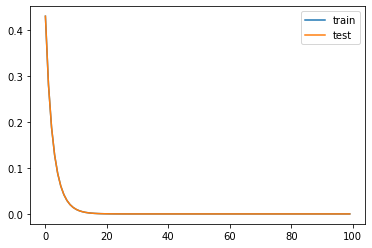

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()